# Ensemble Modelling

# Challenge

In [30]:
# general imports
import pandas as pd         
import numpy as np          
import matplotlib.pyplot as plt  
import seaborn as sb 
from numpy import mean
from numpy import std

# data preprocessing imports
from sklearn.preprocessing import LabelEncoder  
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Model Building imports
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import StackingClassifier

#Model evaluation import
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report,precision_score,recall_score,roc_curve,roc_auc_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Data Loading

In [2]:
#Importing dataset

df=pd.read_csv(r'C:\Users\Admin\Desktop\Machine Learning\Repository\DS2_C5_S7_AllRent_Data_Challenge.csv')
df.head()

,Unnamed: 0,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
0,105408,1.0,0,0f9d07991ba14c82d3d368b72d90270a,04-04-2016 03:34,Gorgeous unit in one of the most genuinely cov...,230 Central Park South,"['Cats Allowed', 'Dogs Allowed', 'Doorman', 'E...",40.7672,6827153,-73.9802,932589de9230b697808216774fa26bd4,['https://photos.renthop.com/2/6821519_0a14cc2...,2800,230 Central Park South,high
1,110219,1.0,1,564d6f608f41e8d4a5e181c4e068e3d9,21-04-2016 20:40,Enormous 1 bedroom apartment in Murray Hill. F...,E 39th St,"['Cats Allowed', 'Dogs Allowed', 'Reduced Fee'...",40.7483,6908998,-73.9741,489ad933197469ae66acd1f7ce18f908,['https://photos.renthop.com/2/6908998_6b00895...,2100,243 E 39th St,high
2,56113,1.0,1,69790fbf0bf7e22b1d0ebc721cf0f633,14-05-2016 05:44,"This 1 bedroom, 1 bathroom spacious apartment ...",E 25th St.,"['Elevator', 'Furnished', 'Hardwood Floors']",40.7399,7013774,-73.9812,792c0f1ad1431397c65db3e69b770928,['https://photos.renthop.com/2/7013774_e7ead5d...,3000,217 E 25th St.,high
3,37765,1.0,2,d0234abbc01a982d54e8d446acc03405,05-06-2016 03:37,SPECTACULAR2 BEDROOM APARTMENT IN LUXURY 24HR ...,West 34th Street,"['Doorman', 'Elevator', 'Dishwasher', 'Hardwoo...",40.7530,7113518,-73.9958,eb5a6c4c2eb6f3e2a085c477afd5a815,['https://photos.renthop.com/2/7113518_d234153...,3000,360 West 34th Street,high
4,67397,1.0,2,a36895b9975c6991ca0fa1d9a99023a1,26-05-2016 05:36,NO FEE.. Newly Reno XL Convertible 2 Br .. Pri...,East 72nd Street,"['Dining Room', 'Doorman', 'Elevator', 'Fitnes...",40.7695,7071666,-73.9603,0a6ba20b892ed61df751420934d1ab51,['https://photos.renthop.com/2/7071666_4f81618...,3300,200 East 72nd Street,high


# Data Exploration

In [3]:
# shape of the dataset
print('The number of samples in data is {}.'.format(df.shape[0]))
print('The number of columns in data is {}.'.format(df.shape[1]))

The number of samples in data is 9871.
The number of columns in data is 16.


In [4]:
# exploring the existing data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       9871 non-null   int64  
 1   bathrooms        9871 non-null   float64
 2   bedrooms         9871 non-null   int64  
 3   building_id      9871 non-null   object 
 4   created          9871 non-null   object 
 5   description      9585 non-null   object 
 6   display_address  9837 non-null   object 
 7   features         9871 non-null   object 
 8   latitude         9871 non-null   float64
 9   listing_id       9871 non-null   int64  
 10  longitude        9871 non-null   float64
 11  manager_id       9871 non-null   object 
 12  photos           9871 non-null   object 
 13  price            9871 non-null   int64  
 14  street_address   9866 non-null   object 
 15  interest_level   9871 non-null   object 
dtypes: float64(3), int64(4), object(9)
memory usage: 1.2+ MB


In [5]:
# exploring the numeric data types
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,9871.0,6.182897e+04,35901.607107,9.000000e+00,3.096800e+04,6.135400e+04,9.322950e+04,1.239950e+05
bathrooms,9871.0,1.210617e+00,0.501985,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01
bedrooms,9871.0,1.533685e+00,1.106696,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,8.000000e+00
latitude,9871.0,4.074717e+01,0.414548,0.000000e+00,4.072750e+01,4.075060e+01,4.077390e+01,4.303460e+01
listing_id,9871.0,7.024062e+06,126910.766917,6.812005e+06,6.914494e+06,7.022816e+06,7.130978e+06,7.742631e+06
longitude,9871.0,-7.396555e+01,0.760686,-8.761340e+01,-7.399220e+01,-7.397830e+01,-7.395510e+01,0.000000e+00
price,9871.0,3.662861e+03,2559.911997,4.300000e+01,2.499000e+03,3.125000e+03,4.047500e+03,9.000000e+04


In [6]:
# exploring the existing data types
df.dtypes

Unnamed: 0           int64
bathrooms          float64
bedrooms             int64
building_id         object
created             object
description         object
display_address     object
features            object
latitude           float64
listing_id           int64
longitude          float64
manager_id          object
photos              object
price                int64
street_address      object
interest_level      object
dtype: object

In [7]:
# checking missing values in data
df.isnull().sum()

Unnamed: 0           0
bathrooms            0
bedrooms             0
building_id          0
created              0
description        286
display_address     34
features             0
latitude             0
listing_id           0
longitude            0
manager_id           0
photos               0
price                0
street_address       5
interest_level       0
dtype: int64

<AxesSubplot:>

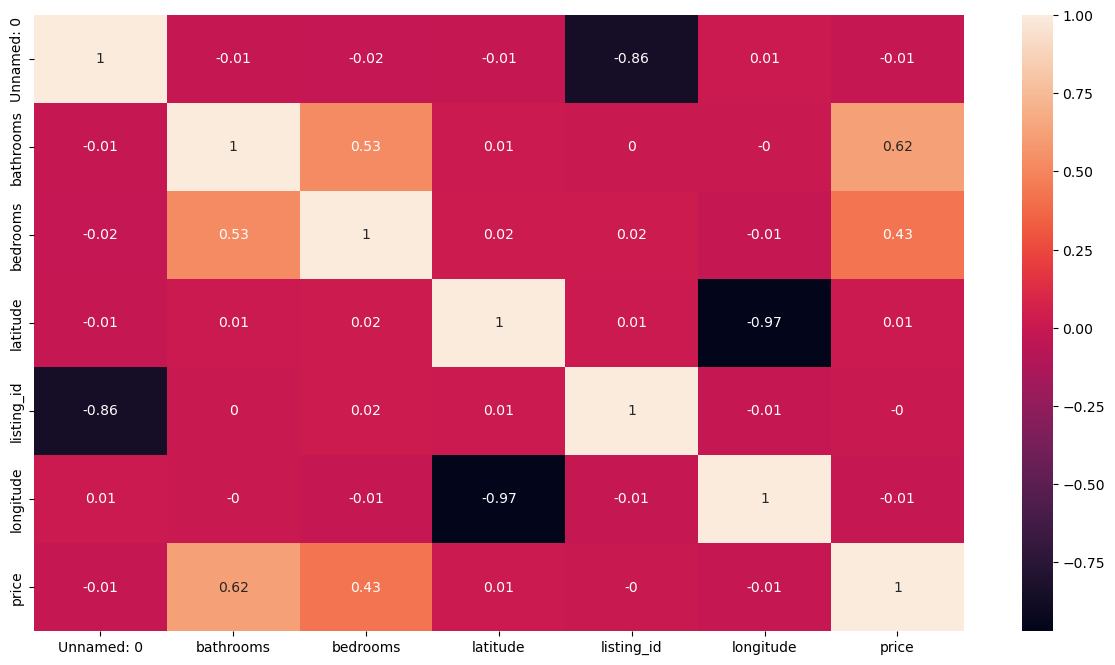

In [8]:
# Checking correlations among the data
plt.figure(figsize=(15,8))
sb.heatmap(round(df.corr(),2),annot=True)

In [9]:
import tabulate
from tabulate import tabulate
cat=[]
con=[]
for i in df.columns:
    if df[i].nunique()>100:
        con.append(i)
    else:
        cat.append(i)
print(tabulate({"Categorical":cat, "Continouos":con},headers=['Categorical','Continuous']))
    

Categorical     Continuous
--------------  ---------------
bathrooms       Unnamed: 0
bedrooms        building_id
interest_level  created
                description
                display_address
                features
                latitude
                listing_id
                longitude
                manager_id
                photos
                price
                street_address


In [10]:
for i in df.columns:
    print(i,':',df[i].nunique())

Unnamed: 0 : 9871
bathrooms : 12
bedrooms : 8
building_id : 3275
created : 7892
description : 8680
display_address : 3233
features : 3548
latitude : 1632
listing_id : 9871
longitude : 1169
manager_id : 2074
photos : 9186
price : 1318
street_address : 5509
interest_level : 3


# Data Visualization

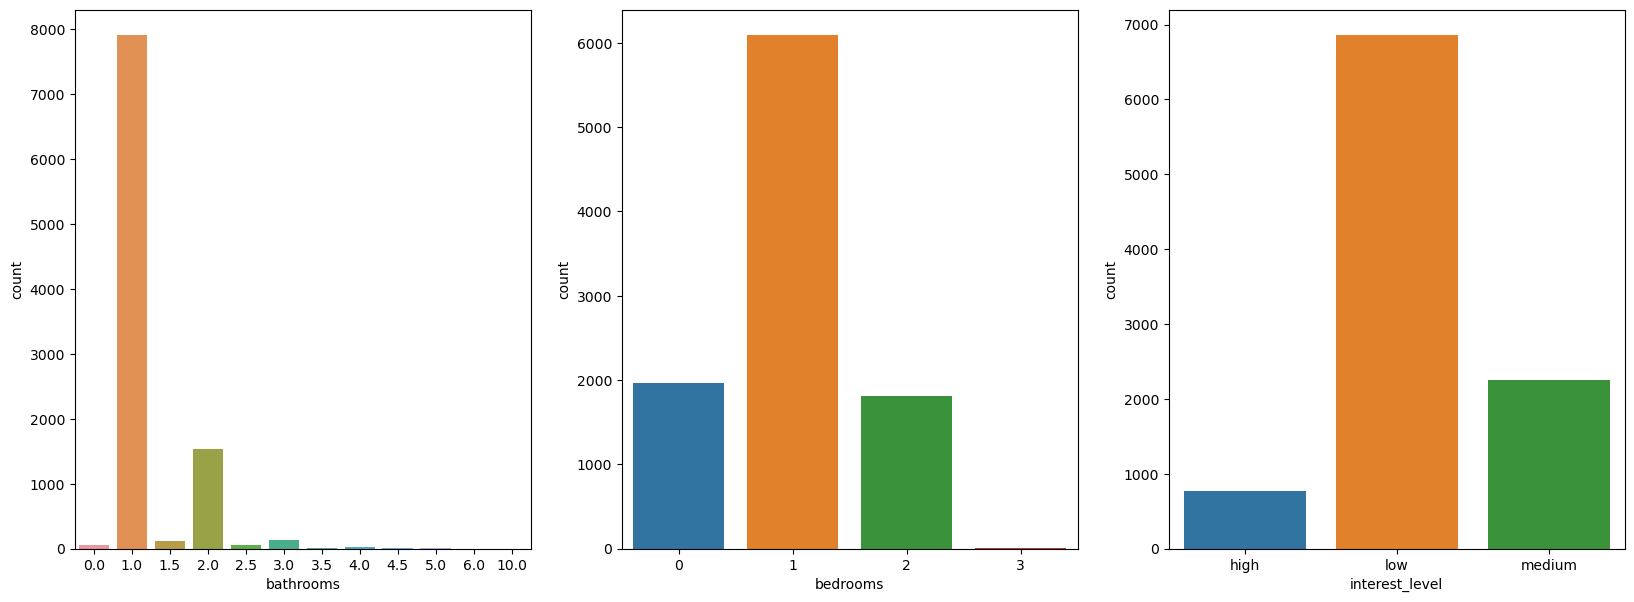

In [11]:
#Visualzing Categorical Data

hrcat=df.copy()
c=3
r=int(len(cat)/c)
fig,axes=plt.subplots(r,c,figsize=(20,7))
for i,ax in zip(cat,axes.flatten()[:len(cat)]):
    sb.countplot(data=hrcat[i],x=hrcat[i],ax=ax)
plt.show()


In [ ]:
numerics=['int16','int32','int64','float16','float32','float64']
new_df=df.select_dtypes(include=numerics)
numerics_col=new_df.columns
n_col=2
n_bins=25
n_row=int((len(numerics_col)/n_col))
fig,axs=plt.subplots(n_row,n_col,tight_layout=True,figsize=(25,20))
for col,ax in zip(numerics_col,axs.flatten()[:len(numerics_col)]):
    sb.histplot(data=new_df[col],kde=True, ax=ax, bins=10)
plt.show()

# Data Preparataion

In [14]:
df['created']=pd.to_datetime(df['created'])

In [15]:
#Dropping unecessary feature
df=df.drop(columns=['Unnamed: 0','building_id','created','description','display_address','manager_id','photos','street_address'])
df.head()

,bathrooms,bedrooms,features,latitude,listing_id,longitude,price,interest_level
0,1.0,0,"['Cats Allowed', 'Dogs Allowed', 'Doorman', 'E...",40.7672,6827153,-73.9802,2800,high
1,1.0,1,"['Cats Allowed', 'Dogs Allowed', 'Reduced Fee'...",40.7483,6908998,-73.9741,2100,high
2,1.0,1,"['Elevator', 'Furnished', 'Hardwood Floors']",40.7399,7013774,-73.9812,3000,high
3,1.0,2,"['Doorman', 'Elevator', 'Dishwasher', 'Hardwoo...",40.7530,7113518,-73.9958,3000,high
4,1.0,2,"['Dining Room', 'Doorman', 'Elevator', 'Fitnes...",40.7695,7071666,-73.9603,3300,high


In [16]:
con.remove('features')

In [22]:
#Label Encoding

lbl=LabelEncoder()
df['features']=lbl.fit_transform(df['features'])
df['interest_level']=lbl.fit_transform(df['interest_level'])

In [23]:
#Creating test and training datasets

x=df.drop(columns='interest_level')
y=df['interest_level']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=47)

print('Size of training dataset: ', x_train.shape)
print('Size of test dataset: ', x_test.shape)

Size of training dataset:  (6909, 7)
Size of test dataset:  (2962, 7)


In [24]:
# Feature Scaling

Sc=StandardScaler()
x_train=Sc.fit_transform(x_train)
x_test=Sc.fit_transform(x_test)

# Model Building

In [25]:
# get a stacking ensemble of models
def get_stacking():
    lbl=[]
    lbl.append(('NB',GaussianNB()))
    lbl.append(('DT',DecisionTreeClassifier()))
    lbl.append(('RF',RandomForestClassifier()))
    lbl.append(('Ada',AdaBoostClassifier()))
    
    l1=LogisticRegression()
        
    model=StackingClassifier(estimators=lbl,final_estimator=l1,cv=5)
    return model

In [28]:
# define the model
model_log=LogisticRegression()
model_tree=DecisionTreeClassifier()
model_random=RandomForestClassifier()
model_ADA=AdaBoostClassifier()

In [31]:
# define the model
model=get_stacking()

In [32]:
model

StackingClassifier(cv=5,
                   estimators=[('NB', GaussianNB()),
                               ('DT', DecisionTreeClassifier()),
                               ('RF', RandomForestClassifier()),
                               ('Ada', AdaBoostClassifier())],
                   final_estimator=LogisticRegression())

# Compare different ensemble models

In [33]:
rf=RandomForestClassifier()
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=42)
score=cross_val_score(rf,x,y,scoring='accuracy',cv=cv,n_jobs=-1)
score

array([0.70546559, 0.70516717, 0.71327254, 0.69199595, 0.6899696 ,
       0.7183384 , 0.70618034, 0.69300912, 0.71529889, 0.70111449,
       0.70850202, 0.70111449, 0.69199595, 0.70314083, 0.70921986,
       0.70516717, 0.68895643, 0.6970618 , 0.71327254, 0.71327254,
       0.71963563, 0.72847011, 0.69300912, 0.69604863, 0.67983789,
       0.70921986, 0.704154  , 0.70719352, 0.6970618 , 0.73353597])

In [34]:
score.mean()

0.7046560755407342

In [35]:
models=[model_log,model_tree,model_random,model_ADA,model]
L,T,R,A,S=[],[],[],[],[]
splits=[2,4,5,6,7,8,9,10]
for i in splits:
    cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=8)
    for j in models:
        score=cross_val_score(j,x,y,scoring='accuracy',cv=cv,n_jobs=-1)
        if j==model_log:
            L.append(score.mean())
        elif j==model_tree:
            T.append(score.mean())
        elif j==model_random:
            R.append(score.mean())
        elif j==model_ADA:
            A.append(score.mean())
        elif j==model:
            S.append(score.mean())


In [36]:
print(L,T,R,A,S)

[0.6945598447838089, 0.6945598447838089, 0.6945598447838089, 0.6945598447838089, 0.6945598447838089, 0.6945598447838089, 0.6945598447838089, 0.6945598447838089] [0.619591839664628, 0.6201658332957325, 0.6208411440494307, 0.6197604622576626, 0.6192539791923891, 0.6211451979649069, 0.6199297001368669, 0.6197944055446855] [0.7041833648496583, 0.7045889751656829, 0.704183535762483, 0.7053655688594099, 0.7038118345509164, 0.7041839459532628, 0.7056018387485353, 0.704859154159266] [0.7086074091393241, 0.708641147330957, 0.7086074091393241, 0.708641147330957, 0.708641147330957, 0.708641147330957, 0.7086074091393241, 0.7086074091393241] [0.7123221652057038, 0.7125921049213322, 0.7132679967786353, 0.7129971683163173, 0.7124231405026477, 0.7123891288504952, 0.7127614453482315, 0.7116467519043107]


In [37]:
pd.DataFrame({'n_splits':splits,'Linear Regression':L,'Random Forest':R,'Ada boost':A},index=list(range(len(splits))))

,n_splits,Linear Regression,Random Forest,Ada boost
0,2,0.69456,0.704183,0.708607
1,4,0.69456,0.704589,0.708641
2,5,0.69456,0.704184,0.708607
3,6,0.69456,0.705366,0.708641
4,7,0.69456,0.703812,0.708641
5,8,0.69456,0.704184,0.708641
6,9,0.69456,0.705602,0.708607
7,10,0.69456,0.704859,0.708607
